# Catalogs & Plate solving

It is often required to match your detected stars with a catalog. Let's load an example image (from an archive like SDSS) and see how to do that

In [1]:
from prose.archive import sdss_image

INFO Querying https://archive.stsci.edu/cgi-bin/dss_form


<AxesSubplot:>

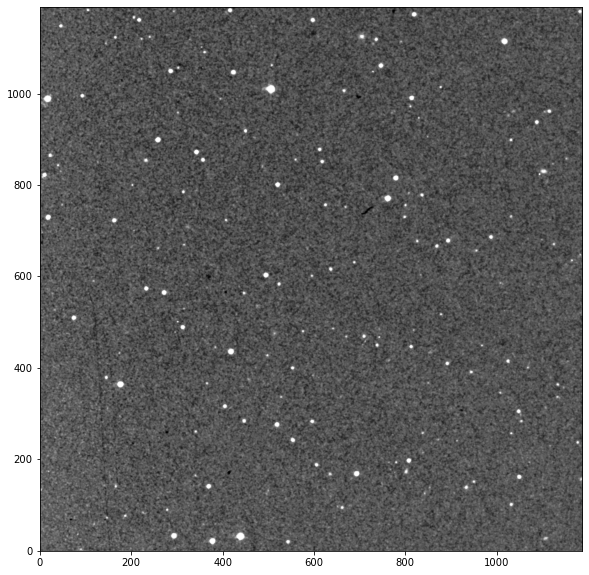

In [2]:
# an image of TRAPPIST-1 
image = sdss_image(("23 06 29.3684", "-05 02 29.0373"), (20, 20))
image.show()

In our case, the image is plate solved, we can check with

In [3]:
image.plate_solved

True

## Querying a catalog

To query a catalog we can use a catalog block from the `prose.blocks.catalogs` module

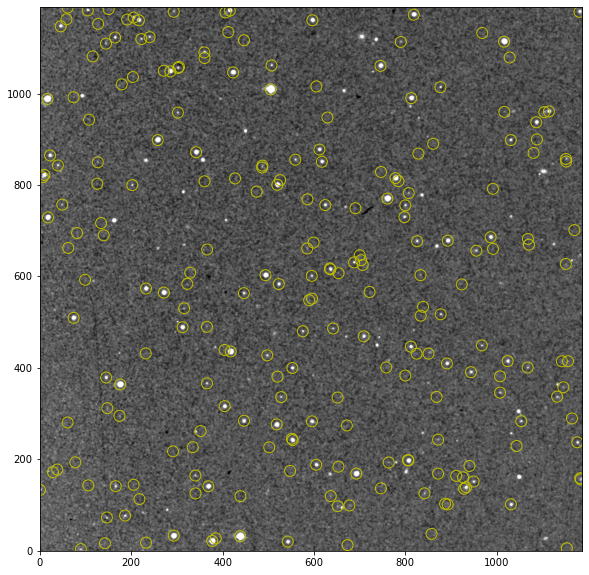

In [4]:
from prose.blocks import catalogs

image = catalogs.GaiaCatalog(mode="replace")(image)

# visualizing the catalog stars
image.show(stars=False)
image.plot_catalog("gaia")

An overlay with labels can be plotted with

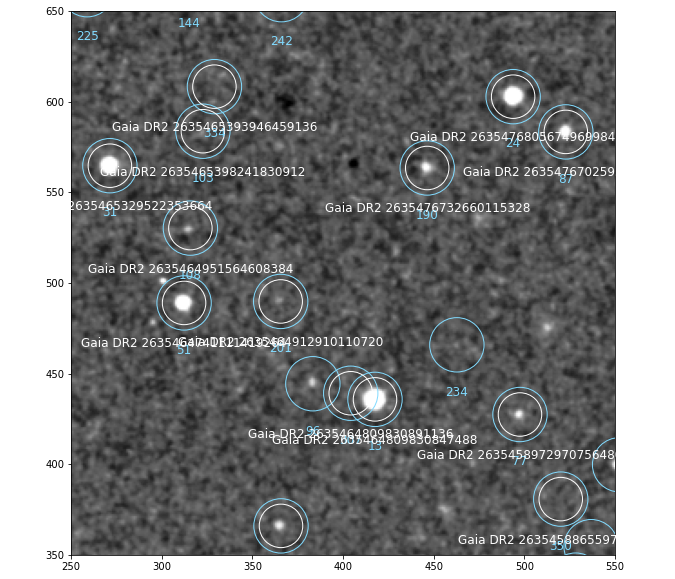

In [5]:
image.show_cutout(star=(400,500), size=300)
image.plot_catalog("gaia", label=True, color="w")

We see here that the `stars_coords` (plotted by default with `image.show_cutout`) are set to the queried stars

The full catalogs can be found at

In [6]:
image.catalogs["gaia"]

,index,solution_id,id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,x,y
0,2,1635721458409799680,Gaia DR2 2635454128247642752,2635454128247642752,529133119,2015.5,346.726152,0.036121,-5.211032,0.036706,...,200111,2.942041,2.819147,2.956454,8.852202,8.459198,9.245207,https://gea.esac.esa.int/data-server/datalink/...,225.880621,-12.072033
1,3,1635721458409799680,Gaia DR2 2635480237353372160,2635480237353372160,1145454718,2015.5,346.646498,0.038742,-4.925421,0.032160,...,200111,1.664209,1.603750,1.729316,3.345175,3.252988,3.437362,https://gea.esac.esa.int/data-server/datalink/...,505.175805,1009.615838
2,5,1635721458409799680,Gaia DR2 2635456945746189696,2635456945746189696,817258039,2015.5,346.666253,0.037022,-5.199083,0.039163,...,200111,1.103787,0.998070,1.129748,1.315697,1.285068,1.346326,https://gea.esac.esa.int/data-server/datalink/...,438.452400,31.418957
3,6,1635721458409799680,Gaia DR2 2635479550158605056,2635479550158605056,132373045,2015.5,346.784044,0.044148,-4.930801,0.048522,...,200111,2.737030,2.628122,2.930485,3.735508,3.536159,3.934858,https://gea.esac.esa.int/data-server/datalink/...,16.542186,988.603203
4,7,1635721458409799680,Gaia DR2 2635462679527068544,2635462679527068544,839303844,2015.5,346.829222,0.042896,-5.068649,0.035594,...,200111,1.125678,0.897681,1.342409,1.620430,1.567091,1.673769,https://gea.esac.esa.int/data-server/datalink/...,-142.123985,495.361809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,484,1635721458409799680,Gaia DR2 2635482986132569984,2635482986132569984,698530280,2015.5,346.516041,0.979046,-4.891357,0.819159,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,968.296771,1132.937036
398,486,1635721458409799680,Gaia DR2 2635463950839905408,2635463950839905408,322319277,2015.5,NaN,2.807954,NaN,1.486994,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,NaN,NaN
399,489,1635721458409799680,Gaia DR2 2635503052219761536,2635503052219761536,1469105036,2015.5,346.808408,1.711332,-4.917415,1.391174,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,-70.199690,1036.112806
400,490,1635721458409799680,Gaia DR2 2635468486325359744,2635468486325359744,469370886,2015.5,346.528149,1.061616,-5.170485,0.891128,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,928.574383,135.354967


## Plate solving

To plate solve an image we can use the following sequence

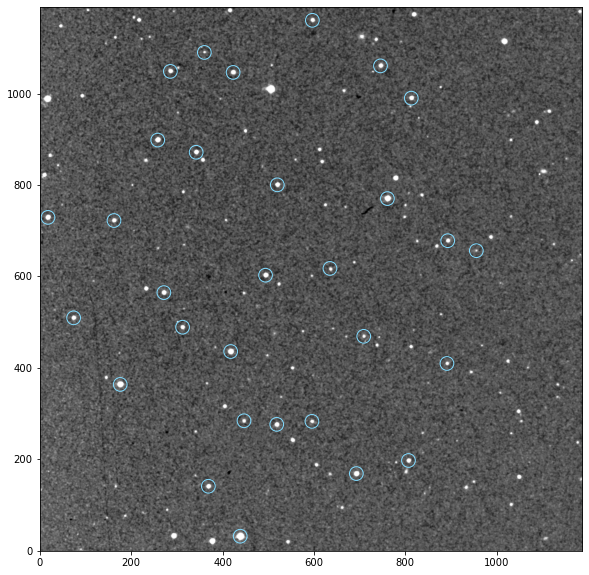

In [7]:
from prose import Sequence, blocks

plate = Sequence([
    blocks.detection.SegmentedPeaks(min_separation=15, n_stars=15),
    blocks.catalogs.PlateSolve(debug=True)
])

plate.run(image, show_progress=False)

Seeing the markers on the stars (only with `debug=True`) in the image shows that the plate solving was successful